# Obtaining the final dataset 

We have already cleaned the first merged dataset so now we will include the social performance part inorder to obtain our final dataset to work with.Note that some of the basic steps mentioned on previous notebooks will not be mentioned with much detail from now on.

Index:

<a class="anchor" id="index"></a>

1. [Final merge](#1)
2. [EDA of final dataset](#2)

    2.1. [Questions and answers](#2.1)
    
3. [Correlation heatmap](#3)

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

## 1. Final merge
<a class="anchor" id="1"></a>

[^Index](#index)

In [3]:
#Opening the previous merged dataset we work with

data_merged = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/data_clean_part1.csv')

In [4]:
data_merged.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data_merged.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,Region
0,1st Valley Bank,2000,0.5174,4850280.0,615269.0,9665.0,70.663687,63.0,0.1269,Philippines,E. Asia and the Pacific
1,1st Valley Bank,2001,0.5015,4872278.0,704096.0,10121.0,70.663687,81.0,0.1445,Philippines,E. Asia and the Pacific
2,1st Valley Bank,2002,0.3290,5299626.0,791249.0,17138.0,70.663687,91.0,0.1493,Philippines,E. Asia and the Pacific
3,1st Valley Bank,2003,0.3809,7188694.0,966071.0,17973.0,9.000000,114.0,0.1344,Philippines,E. Asia and the Pacific
4,1st Valley Bank,2004,0.4366,10906346.0,548179.0,21350.0,12.000000,142.0,0.0503,Philippines,E. Asia and the Pacific


In [6]:
data_merged.shape

(20116, 11)

In [7]:
data_merged['MFI Name'].nunique()

2994

In [8]:
#Opening dataset no. 3 to prepare the merge

data3 = pd.read_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/social_dataset_selectedf.csv')

In [9]:
data3.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [10]:
data3.head()

,MFI Name,As of Date,Period Type,Fiscal Year,Client protection > Interest rate calculation method(s) > Declining balance interest method,Client protection > Interest rate calculation method(s) > Flat interest method,Governance & HR > Human resource policies in place > Anti-harassment policy,Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution),Governance & HR > SPM champion and/or SPM committee on board > Yes,Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans,...,Social goals > Development goals > Improvement of adult education,Social goals > Development goals > Increased access to financial services,Social goals > Development goals > Poverty reduction,Social goals > Measures client poverty > Yes,Social goals > Poverty targets > Low income clients,Social goals > Poverty targets > Poor clients,Social goals > Poverty targets > Very poor clients,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Women
0,1st Valley Bank,12/31/2011,ANN,2011,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
1,1st Valley Bank,12/31/2012,ANN,2012,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
2,1st Valley Bank,12/31/2013,ANN,2013,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
3,1st Valley Bank,12/31/2014,ANN,2014,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,1,1
4,1st Valley Bank,12/31/2018,ANN,2018,1,0,1,1,0,1,...,0,1,0,0,0,0,0,0,1,1


In [11]:
data3.shape

(4899, 30)

In [12]:
data3['MFI Name'].nunique()

1221

In [13]:
data3['MFI Name'].unique().sum()

"1st Valley BankA3CAB Bank ZambiaAB MfBABAABFACADACBAAccessBankAccessBank - TZAAccessBank TajikistanAccion MfB NigeriaACDFACEACEP Burkina SAACFACFBACFIMEACLEDAACLEDA LaoACODEPACORDEACSIActuar CaldasActuar QuindioActuar TolimaAdenADESHADESTRAAdhikarADICHADICLAADIMAdivasi BachatADMICADRA PeruADRIADRIA mikroAdvans - CIAdvans - NGAAdvans CamerounAdvans PakistanAE&IAetosAFKAFODENICAFRICA FINANCESAfricaWorksAFS Credit UnionAGAHEAGAPEAggarAgoraAgroAmigoAgroCapitalAgroInvest - SerbiaAGUDESAAhantaman RBAHSETFINAkhuwatAl Amal BankAl AmanaAl KaramaAl KuraimiAl MajmouaAlcaravanAlekano SLSALFINALIDEALLIANCEAlliance GroupAlmazkreditservisAl-Mehran RuralALSOLAlter ModusAlternativaAlternativa 3Alternativa MicrofinanzasAlternative Development InitiativeAlteyaAl-ThiqaAlwatani (National Microfinance Bank)AMAAmartha MicrofinanceAmasezeranoAMCAMC de R.L.AMEXTRAAMKAML - TZAAmlokAMOSAMPLAMRETAMSAMZANEDAnnapurna CooperativeAnnapurna MicrofinanceAPACOOPAPFI-BurkinaAPMBApna MicrofinanceApoyo EconómicoApoyo Inte

In [14]:
#List of all the columns included on dataset no. 3

data3.columns

Index(['MFI Name', 'As of Date', 'Period Type', 'Fiscal Year',
       'Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans',
       'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes',
       'Products & services > Wome

In [15]:
#I keep only the variables I want to analyse. For this final selection I am using common sense

data3.drop(columns=['Social goals > Poverty targets > Very poor clients', 'Social goals > Poverty targets > Poor clients', 
                   'Social goals > Poverty targets > Low income clients', 'Social goals > Measures client poverty > Yes',
                   'Products & services > Enterprise services (nonfinancial) > Yes',
       'Products & services > Other education services (nonfinancial) > Yes', 
                    "Products & services > Women's empowerment services (nonfinancial) > Yes",
                   'As of Date', 'Period Type'], axis=1,inplace=True)

In [16]:
data3.shape

(4899, 21)

In [17]:
data3.head()

,MFI Name,Fiscal Year,Client protection > Interest rate calculation method(s) > Declining balance interest method,Client protection > Interest rate calculation method(s) > Flat interest method,Governance & HR > Human resource policies in place > Anti-harassment policy,Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution),Governance & HR > SPM champion and/or SPM committee on board > Yes,Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans,Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans,Social goals > Development goals > Children's schooling,...,Social goals > Development goals > Employment generation,Social goals > Development goals > Gender equality and women's empowerment,Social goals > Development goals > Health improvement,Social goals > Development goals > Housing,Social goals > Development goals > Improvement of adult education,Social goals > Development goals > Increased access to financial services,Social goals > Development goals > Poverty reduction,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Women
0,1st Valley Bank,2011,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0,1,0,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,1,0,1,1,0,1,1,0,...,0,0,0,0,0,1,0,0,1,1


In [17]:
#With my selected variables I am merging all the information I have in just one dataset!

social = pd.merge(data_merged, data3, how = 'inner')
social.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Social goals > Development goals > Employment generation,Social goals > Development goals > Gender equality and women's empowerment,Social goals > Development goals > Health improvement,Social goals > Development goals > Housing,Social goals > Development goals > Improvement of adult education,Social goals > Development goals > Increased access to financial services,Social goals > Development goals > Poverty reduction,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Women
0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,Philippines,...,0,0,0,0,0,1,0,0,1,1


## 2. EDA of final dataset
<a class="anchor" id="2"></a>

[^Index](#index)

In [18]:
social.shape

(3661, 30)

In [19]:
#Now my dataset shows only 1004 institutions (previously I had more than 3000)

social['MFI Name'].nunique()

1004

In [20]:
social.head(50)

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Social goals > Development goals > Employment generation,Social goals > Development goals > Gender equality and women's empowerment,Social goals > Development goals > Health improvement,Social goals > Development goals > Housing,Social goals > Development goals > Improvement of adult education,Social goals > Development goals > Increased access to financial services,Social goals > Development goals > Poverty reduction,Social goals > Target market > Adolescents and youth (below 18),Social goals > Target market > Clients living in urban areas,Social goals > Target market > Women
0,1st Valley Bank,2011,0.501300,8.505598e+07,4.029479e+06,77543.000000,34.000000,494.000000,0.047800,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.712500,1.127917e+08,6.231245e+06,72351.000000,35.000000,532.000000,0.055200,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.741400,1.163293e+08,1.050713e+07,47981.000000,35.000000,562.000000,0.090300,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.666900,1.164236e+08,1.653796e+07,53388.000000,38.000000,666.000000,0.142000,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.842600,1.326828e+08,1.155984e+07,48153.000000,51.000000,769.000000,0.087200,Philippines,...,0,0,0,0,0,1,0,0,1,1
5,A3C,2011,0.467200,3.389810e+06,7.920463e+06,5494.000000,70.663687,236.000000,0.070948,Cameroon,...,1,1,1,1,0,1,1,1,1,1
6,A3C,2012,0.354800,3.955686e+06,7.920463e+06,8444.000000,72.000000,227.000000,0.070948,Cameroon,...,1,1,1,1,0,1,1,1,1,1
7,AB Bank Zambia,2013,1.066588,2.609106e+08,7.920463e+06,3745.000000,4.000000,230.000000,0.070948,Zambia,...,1,1,0,0,0,1,1,0,1,1
8,AB Bank Zambia,2014,0.646000,8.309394e+06,2.080500e+05,7107.000000,5.000000,292.000000,0.025000,Zambia,...,1,1,0,0,0,1,1,0,1,1
9,AB Bank Zambia,2018,0.678500,1.822508e+07,8.341880e+05,14841.000000,7.000000,454.000000,0.045800,Zambia,...,1,1,0,0,0,1,1,0,1,1


In [21]:
#The name of each column are very long. I must rename them.

social.columns

Index(['MFI Name', 'Fiscal Year',
       'Average loan balance per borrower / GNI per capita',
       'Gross Loan Portfolio',
       'Gross Loan Portfolio > Delinquency > One month or more',
       'Number of active borrowers', 'Offices', 'Personnel',
       'Portfolio at risk > 30 days', 'Country', 'Region',
       'Client protection > Interest rate calculation method(s) > Declining balance interest method',
       'Client protection > Interest rate calculation method(s) > Flat interest method',
       'Governance & HR > Human resource policies in place > Anti-harassment policy',
       'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)',
       'Governance & HR > SPM champion and/or SPM committee on board > Yes',
       'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans',
       'Products & services > Credit product offering > Income

In [22]:
social.rename(columns={'Client protection > Interest rate calculation method(s) > Declining balance interest method': 'Declining balance i', 'Client protection > Interest rate calculation method(s) > Flat interest method': 'Flat i',
                      'Governance & HR > Human resource policies in place > Anti-harassment policy': 'Anti-harassment', 
                      'Governance & HR > Human resource policies in place > Social protection (medical insurance and/or pension contribution)': 'Social protection', 
                      'Governance & HR > SPM champion and/or SPM committee on board > Yes': 'SPM on staff', 
                      'Products & services > Credit product offering > Income generating loans > Income generating loan types > Agricultural/livestock loans': 'Agriculture and livestock', 
                      'Products & services > Credit product offering > Income generating loans > Income generating loan types > SME loans': 'SME loans', 
                      "Social goals > Development goals > Children's schooling": 'Children schooling', 
                      'Social goals > Development goals > Development of start-up enterprises': 'Start-up development', 
                      'Social goals > Development goals > Employment generation': 'Employment generation', 
                      "Social goals > Development goals > Gender equality and women's empowerment": 'Gender equality and womens empowerment', 
                      'Social goals > Development goals > Health improvement': 'Health improvement', 
                      'Social goals > Development goals > Housing': 'Housing', 'Social goals > Development goals > Improvement of adult education': 'Adult education', 
                      'Social goals > Development goals > Increased access to financial services': 'Access financial services',
                      'Social goals > Development goals > Poverty reduction': 'Porverty reduction', 'Social goals > Target market > Adolescents and youth (below 18)': 'Youngsters', 
                      'Social goals > Target market > Clients living in urban areas': 'Clients urban areas', 'Social goals > Target market > Women': 'Women'}, inplace=True)

In [23]:
social.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
0,1st Valley Bank,2011,0.5013,85055980.0,4029479.0,77543.0,34.0,494.0,0.0478,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.7125,112791709.0,6231245.0,72351.0,35.0,532.0,0.0552,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.7414,116329302.0,10507132.0,47981.0,35.0,562.0,0.0903,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.6669,116423597.0,16537965.0,53388.0,38.0,666.0,0.1420,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.8426,132682781.0,11559835.0,48153.0,51.0,769.0,0.0872,Philippines,...,0,0,0,0,0,1,0,0,1,1


In [24]:
social.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,3661.0,2.012331e+03,2.477702e+00,2007.0000,2.011000e+03,2.012000e+03,2.014000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,3661.0,7.602578e-01,6.706518e+00,0.0008,1.182000e-01,2.796000e-01,7.157000e-01,3.148287e+02
Gross Loan Portfolio,3661.0,8.116209e+07,3.038109e+08,27.0000,3.014310e+06,1.047404e+07,4.222927e+07,6.052089e+09
Gross Loan Portfolio > Delinquency > One month or more,3661.0,5.793795e+06,7.492795e+07,0.0000,1.027550e+05,6.308680e+05,7.920463e+06,4.360684e+09
Number of active borrowers,3661.0,1.388159e+05,5.743341e+05,3.0000,5.211000e+03,1.910100e+04,8.538000e+04,8.166287e+06
Offices,3661.0,6.649752e+01,2.076565e+02,0.0000,7.000000e+00,1.700000e+01,6.000000e+01,3.154000e+03
Personnel,3661.0,6.877840e+02,1.826874e+03,2.0000,5.300000e+01,1.790000e+02,6.550000e+02,2.674900e+04
Portfolio at risk > 30 days,3661.0,6.204396e-02,1.444515e-01,0.0000,1.220000e-02,3.760000e-02,7.094753e-02,5.484500e+00
Declining balance i,3661.0,6.470910e-01,4.779400e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,3661.0,3.381590e-01,4.731476e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [25]:
social.dropna()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
0,1st Valley Bank,2011,0.5013,85055980.0,4.029479e+06,77543.0,34.0,494.0,0.047800,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.7125,112791709.0,6.231245e+06,72351.0,35.0,532.0,0.055200,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.7414,116329302.0,1.050713e+07,47981.0,35.0,562.0,0.090300,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.6669,116423597.0,1.653796e+07,53388.0,38.0,666.0,0.142000,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.8426,132682781.0,1.155984e+07,48153.0,51.0,769.0,0.087200,Philippines,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,XMI,2016,0.3327,5166428.0,3.126110e+05,10709.0,7.0,73.0,0.060500,Laos,...,0,0,0,0,0,1,1,1,0,1
3657,Yehu,2012,0.2003,3148918.0,7.920463e+06,14558.0,9.0,77.0,0.070948,Kenya,...,0,0,0,0,0,0,1,0,0,1
3658,YFMCC,2011,0.6543,5816410.0,1.626200e+04,1760.0,1.0,52.0,0.003900,"China, People's Republic of",...,1,0,1,0,0,1,1,0,0,0
3659,YVU Financial,2014,0.0980,1247043.0,1.175100e+04,8104.0,8.0,46.0,0.009400,India,...,1,1,0,0,0,0,1,0,1,1


In [26]:
social.shape

(3661, 30)

In [27]:
social.drop_duplicates()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
0,1st Valley Bank,2011,0.5013,85055980.0,4.029479e+06,77543.0,34.0,494.0,0.047800,Philippines,...,0,0,0,0,0,1,0,0,1,1
1,1st Valley Bank,2012,0.7125,112791709.0,6.231245e+06,72351.0,35.0,532.0,0.055200,Philippines,...,0,0,0,0,0,1,0,0,1,1
2,1st Valley Bank,2013,0.7414,116329302.0,1.050713e+07,47981.0,35.0,562.0,0.090300,Philippines,...,0,0,0,0,0,1,0,0,1,1
3,1st Valley Bank,2014,0.6669,116423597.0,1.653796e+07,53388.0,38.0,666.0,0.142000,Philippines,...,0,0,0,0,0,1,0,0,1,1
4,1st Valley Bank,2018,0.8426,132682781.0,1.155984e+07,48153.0,51.0,769.0,0.087200,Philippines,...,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3656,XMI,2016,0.3327,5166428.0,3.126110e+05,10709.0,7.0,73.0,0.060500,Laos,...,0,0,0,0,0,1,1,1,0,1
3657,Yehu,2012,0.2003,3148918.0,7.920463e+06,14558.0,9.0,77.0,0.070948,Kenya,...,0,0,0,0,0,0,1,0,0,1
3658,YFMCC,2011,0.6543,5816410.0,1.626200e+04,1760.0,1.0,52.0,0.003900,"China, People's Republic of",...,1,0,1,0,0,1,1,0,0,0
3659,YVU Financial,2014,0.0980,1247043.0,1.175100e+04,8104.0,8.0,46.0,0.009400,India,...,1,1,0,0,0,0,1,0,1,1


In [28]:
social.shape

(3661, 30)

## 2.1 Questions and answers
<a class="anchor" id="2.1"></a>

[^Index](#index)

Previous to starting my analysis and meanwhile I was cleaning the data of the 3 datasets I had the idea of writing down all the questions that came to me regarding this project. I amazed of how many questions I could
answer thanks to EDA.

I hope you find my findings useful!

**Do MFI practice social policies? Which are the most frequent?**

 The goal was to analyse the behaviour of the top 5 MFIs: ASA Bangladesh, Satin, SKDRDP, Compartambos Banco and Credi Amigo.

In [31]:
asa_b = social[social['MFI Name']=='ASA Bangladesh']
asa_b

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
376,ASA Bangladesh,2011,0.1769,5.797777e+08,1.342627e+07,4359218.0,3154.0,21422.0,0.0232,Bangladesh,...,1,1,1,0,0,1,1,0,1,1
377,ASA Bangladesh,2012,0.2031,6.386218e+08,1.683370e+07,4181690.0,3025.0,20969.0,0.0264,Bangladesh,...,1,1,1,0,0,1,1,0,1,1
378,ASA Bangladesh,2012,0.1804,7.168357e+08,1.725156e+07,4181690.0,3025.0,20969.0,0.0241,Bangladesh,...,1,1,1,0,0,1,1,0,1,1
379,ASA Bangladesh,2013,0.1701,7.635558e+08,7.920463e+06,4444461.0,2931.0,20294.0,0.0341,Bangladesh,...,1,1,1,0,0,1,1,0,1,1
380,ASA Bangladesh,2016,0.2796,1.919018e+09,6.221778e+07,6794853.0,2959.0,25885.0,0.0324,Bangladesh,...,1,0,0,0,0,1,1,0,1,1


In [32]:
asa_b.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,5.0,2.012800e+03,1.923538e+00,2.011000e+03,2.012000e+03,2.012000e+03,2.013000e+03,2.016000e+03
Average loan balance per borrower / GNI per capita,5.0,2.020200e-01,4.510307e-02,1.701000e-01,1.769000e-01,1.804000e-01,2.031000e-01,2.796000e-01
Gross Loan Portfolio,5.0,9.235618e+08,5.609477e+08,5.797777e+08,6.386218e+08,7.168357e+08,7.635558e+08,1.919018e+09
Gross Loan Portfolio > Delinquency > One month or more,5.0,2.352995e+07,2.194736e+07,7.920463e+06,1.342627e+07,1.683370e+07,1.725156e+07,6.221778e+07
Number of active borrowers,5.0,4.792382e+06,1.125218e+06,4.181690e+06,4.181690e+06,4.359218e+06,4.444461e+06,6.794853e+06
Offices,5.0,3.018800e+03,8.608252e+01,2.931000e+03,2.959000e+03,3.025000e+03,3.025000e+03,3.154000e+03
Personnel,5.0,2.190780e+04,2.259489e+03,2.029400e+04,2.096900e+04,2.096900e+04,2.142200e+04,2.588500e+04
Portfolio at risk > 30 days,5.0,2.804000e-02,4.933863e-03,2.320000e-02,2.410000e-02,2.640000e-02,3.240000e-02,3.410000e-02
Declining balance i,5.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,5.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [33]:
satin = social[social['MFI Name']=='Satin']
satin

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
3185,Satin,2009,0.140200,28420622.0,7.920463e+06,166102.0,97.000000,1103.000000,0.0245,India,...,1,1,0,0,0,1,1,0,1,1
3186,Satin,2010,0.141200,51717233.0,6.984910e+05,251099.0,163.000000,1332.000000,0.0135,India,...,1,1,0,0,0,1,1,0,1,1
3187,Satin,2011,0.138600,62933708.0,5.389370e+05,306317.0,144.000000,1058.000000,0.0086,India,...,1,1,0,0,0,1,1,0,1,1
3188,Satin,2012,0.148700,106858061.0,8.509700e+05,485033.0,161.000000,1437.000000,0.0080,India,...,1,1,0,0,0,1,1,0,1,1
3189,Satin,2013,0.148300,175833409.0,7.750110e+05,800028.0,199.000000,1958.000000,0.0044,India,...,1,1,0,0,0,1,1,0,1,1
3190,Satin,2014,0.183600,343383058.0,1.050911e+06,1190999.0,279.000000,2496.000000,0.0031,India,...,1,1,0,0,0,1,1,0,1,1
3191,Satin,2015,0.170100,494221795.0,2.281968e+06,1851113.0,431.000000,3918.000000,0.0046,India,...,1,0,0,0,1,1,1,0,1,1
3192,Satin,2016,0.154600,557636972.0,1.480990e+08,2298095.0,618.000000,5801.000000,0.2656,India,...,1,0,0,0,0,1,1,0,1,1
3193,Satin,2017,0.207000,780595228.0,4.598876e+07,2401701.0,809.000000,7653.000000,0.0589,India,...,1,0,0,0,0,1,1,0,1,1
3194,Satin,2018,1.066588,919986908.0,3.094977e+07,3149607.0,70.663687,672.064855,0.0336,India,...,1,0,0,0,0,1,1,0,1,1


In [34]:
satin.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,10.0,2.013500e+03,3.027650e+00,2.009000e+03,2.011250e+03,2.013500e+03,2.015750e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,10.0,2.498888e-01,2.878015e-01,1.386000e-01,1.429750e-01,1.516500e-01,1.802250e-01,1.066588e+00
Gross Loan Portfolio,10.0,3.521587e+08,3.229125e+08,2.842062e+07,7.391480e+07,2.596082e+08,5.417832e+08,9.199869e+08
Gross Loan Portfolio > Delinquency > One month or more,10.0,2.391543e+07,4.637749e+07,5.389370e+05,7.940008e+05,1.666440e+06,2.519244e+07,1.480990e+08
Number of active borrowers,10.0,1.290009e+06,1.066305e+06,1.661020e+05,3.509960e+05,9.955135e+05,2.186350e+06,3.149607e+06
Offices,10.0,2.971664e+02,2.458902e+02,7.066369e+01,1.482500e+02,1.810000e+02,3.930000e+02,8.090000e+02
Personnel,10.0,2.742806e+03,2.334083e+03,6.720649e+02,1.160250e+03,1.697500e+03,3.562500e+03,7.653000e+03
Portfolio at risk > 30 days,10.0,4.248000e-02,8.032339e-02,3.100000e-03,5.450000e-03,1.105000e-02,3.132500e-02,2.656000e-01
Declining balance i,10.0,6.000000e-01,5.163978e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,10.0,2.000000e-01,4.216370e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [35]:
skdrdp = social[social['MFI Name']=='SKDRDP']
skdrdp.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,4.0,2.016250e+03,1.707825e+00,2.014000e+03,2.015500e+03,2.016500e+03,2.017250e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,4.0,4.029721e-01,4.457266e-01,1.061000e-01,1.829000e-01,2.196000e-01,4.396721e-01,1.066588e+00
Gross Loan Portfolio,4.0,1.072262e+09,3.821882e+08,5.727333e+08,8.830989e+08,1.140227e+09,1.329390e+09,1.435863e+09
Gross Loan Portfolio > Delinquency > One month or more,4.0,7.396758e+06,4.580560e+06,1.633266e+06,5.831191e+06,7.565308e+06,9.130874e+06,1.282315e+07
Number of active borrowers,4.0,3.220304e+06,3.400498e+05,2.856557e+06,2.974024e+06,3.226404e+06,3.472684e+06,3.571852e+06
Offices,4.0,1.545000e+02,1.258306e+01,1.360000e+02,1.525000e+02,1.590000e+02,1.610000e+02,1.640000e+02
Personnel,4.0,6.730750e+03,1.271702e+02,6.595000e+03,6.640000e+03,6.730000e+03,6.820750e+03,6.868000e+03
Portfolio at risk > 30 days,4.0,6.450000e-03,3.109662e-03,2.900000e-03,4.475000e-03,6.500000e-03,8.475000e-03,9.900000e-03
Declining balance i,4.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,4.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [36]:
compartamos_b = social[social['MFI Name']=='Compartamos Banco']
compartamos_b.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,6.0,2.010333e+03,2.581989e+00,2.007000e+03,2.008500e+03,2.010500e+03,2.011750e+03,2.014000e+03
Average loan balance per borrower / GNI per capita,6.0,4.211667e-02,6.380726e-03,3.570000e-02,3.645000e-02,4.145000e-02,4.712500e-02,5.030000e-02
Gross Loan Portfolio,6.0,8.045239e+08,3.668724e+08,3.777269e+08,5.060988e+08,8.103971e+08,1.055139e+09,1.287237e+09
Gross Loan Portfolio > Delinquency > One month or more,6.0,2.055232e+07,1.719542e+07,7.086045e+06,8.506800e+06,1.295300e+07,2.821112e+07,5.000000e+07
Number of active borrowers,6.0,1.893338e+06,7.322021e+05,8.387540e+05,1.357386e+06,2.148218e+06,2.454881e+06,2.573961e+06
Offices,6.0,3.936667e+02,1.107261e+02,2.520000e+02,3.235000e+02,3.805000e+02,4.652500e+02,5.510000e+02
Personnel,6.0,1.069433e+04,4.852798e+03,4.277000e+03,6.902750e+03,1.153550e+04,1.426850e+04,1.628000e+04
Portfolio at risk > 30 days,6.0,3.637459e-02,1.994221e-02,1.710000e-02,2.180000e-02,3.290000e-02,4.295000e-02,7.094753e-02
Declining balance i,6.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Flat i,6.0,6.666667e-01,5.163978e-01,0.000000e+00,2.500000e-01,1.000000e+00,1.000000e+00,1.000000e+00


In [37]:
compartamos_b.shape

(6, 30)

In [38]:
credi_a = social[social['MFI Name']=='CrediAmigo']
credi_a.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,6.0,2.011500e+03,1.870829e+00,2.009000e+03,2.010250e+03,2.011500e+03,2.012750e+03,2.014000e+03
Average loan balance per borrower / GNI per capita,6.0,5.563333e-02,8.729185e-03,4.690000e-02,5.077500e-02,5.270000e-02,5.845000e-02,7.100000e-02
Gross Loan Portfolio,6.0,6.908087e+08,2.790286e+08,3.028531e+08,5.020513e+08,7.111082e+08,9.030242e+08,1.020421e+09
Gross Loan Portfolio > Delinquency > One month or more,6.0,1.235587e+07,7.047926e+06,5.547195e+06,8.316517e+06,1.071244e+07,1.330865e+07,2.547122e+07
Number of active borrowers,6.0,1.199131e+06,5.221792e+05,5.287920e+05,8.148850e+05,1.203116e+06,1.584817e+06,1.862239e+06
Offices,6.0,2.787773e+02,1.421399e+02,7.066369e+01,1.942500e+02,2.860000e+02,3.980000e+02,4.310000e+02
Personnel,6.0,3.582167e+03,8.042824e+02,2.180000e+03,3.271750e+03,3.896000e+03,4.068000e+03,4.332000e+03
Portfolio at risk > 30 days,6.0,2.183333e-02,1.182196e-02,1.450000e-02,1.535000e-02,1.630000e-02,2.197500e-02,4.500000e-02
Declining balance i,6.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Flat i,6.0,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [39]:
credi_a.shape

(6, 30)

**Which kind of interest rate do banks prefer? Flat interest or declining balance?**

 Banks offer their products (loans) with an interest calculation method based on a declining balance.

**Does the interest calculation method differs from one region to other?**

In [42]:
social.Region.unique()

array(['E. Asia and the Pacific', 'Africa', 'Middle East and N. Africa',
       'E. Europe and C. Asia', 'LATAM and Caribbean', 'South Asia'],
      dtype=object)

In [43]:
eap = social[social['Region']=='E. Asia and the Pacific']
eap.describe().T
#There's almost no difference between flat interest and declining balance.

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,372.0,2.012785e+03,2.760325e+00,2007.0000,2.011000e+03,2.013000e+03,2.014000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,372.0,8.178556e-01,1.737000e+00,0.0172,7.500000e-02,2.076000e-01,7.161250e-01,1.726070e+01
Gross Loan Portfolio,372.0,1.645239e+08,6.913603e+08,92428.0000,3.115242e+06,9.725038e+06,4.962567e+07,6.052089e+09
Gross Loan Portfolio > Delinquency > One month or more,372.0,2.732793e+06,5.101078e+06,0.0000,5.779025e+04,4.156860e+05,5.012296e+06,6.234909e+07
Number of active borrowers,372.0,2.302589e+05,9.883641e+05,363.0000,5.515500e+03,2.730100e+04,1.220175e+05,8.166287e+06
Offices,372.0,7.278844e+01,1.455986e+02,0.0000,7.000000e+00,2.300000e+01,7.066369e+01,1.150000e+03
Personnel,372.0,9.914214e+02,1.804425e+03,6.0000,7.450000e+01,2.460000e+02,9.940000e+02,1.118200e+04
Portfolio at risk > 30 days,372.0,5.918682e-02,1.103845e-01,0.0000,5.075000e-03,2.210000e-02,7.094753e-02,1.000000e+00
Declining balance i,372.0,4.677419e-01,4.996303e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
Flat i,372.0,4.892473e-01,5.005576e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


In [44]:
africa = social[social['Region']=='Africa']
africa.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,430.0,2.012984e+03,2.305808e+00,2007.0000,2.012000e+03,2.013000e+03,2.014000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,430.0,1.095930e+00,2.857829e+00,0.0068,2.691500e-01,6.662500e-01,1.066588e+00,5.366710e+01
Gross Loan Portfolio,430.0,3.974850e+07,1.546533e+08,27.0000,1.441017e+06,5.912386e+06,2.332282e+07,2.159462e+09
Gross Loan Portfolio > Delinquency > One month or more,430.0,4.430527e+06,7.412722e+06,0.0000,2.124858e+05,1.638550e+06,7.920463e+06,8.255624e+07
Number of active borrowers,430.0,6.347861e+04,1.237347e+05,3.0000,6.202000e+03,2.111600e+04,8.241175e+04,8.006110e+05
Offices,430.0,4.633758e+01,8.084857e+01,1.0000,6.000000e+00,1.600000e+01,7.066369e+01,5.770000e+02
Personnel,430.0,4.337930e+02,7.625378e+02,3.0000,5.825000e+01,1.720000e+02,6.507500e+02,7.488000e+03
Portfolio at risk > 30 days,430.0,7.726248e-02,9.175176e-02,0.0000,3.717500e-02,7.094753e-02,7.094753e-02,1.000000e+00
Declining balance i,430.0,5.255814e-01,4.999268e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,430.0,4.860465e-01,5.003874e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


The declining balance calculation is often more used

In [45]:
mena = social[social['Region']=='Middle East and N. Africa']
mena.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,139.0,2.011568e+03,2.724155e+00,2007.0000,2.009000e+03,2.012000e+03,2.013000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,139.0,3.485729e-01,4.050206e-01,0.0421,1.054000e-01,1.447000e-01,4.865000e-01,2.268200e+00
Gross Loan Portfolio,139.0,4.195908e+07,5.921198e+07,51703.0000,6.557026e+06,1.710034e+07,4.435102e+07,2.609106e+08
Gross Loan Portfolio > Delinquency > One month or more,139.0,3.839095e+06,4.249356e+06,0.0000,2.014170e+05,1.291667e+06,7.920463e+06,2.279455e+07
Number of active borrowers,139.0,6.614074e+04,8.628178e+04,201.0000,1.083750e+04,2.367400e+04,1.025205e+05,3.624810e+05
Offices,139.0,5.493270e+01,1.066046e+02,1.0000,1.000000e+01,1.700000e+01,4.900000e+01,5.770000e+02
Personnel,139.0,4.274205e+02,5.049540e+02,9.0000,1.000000e+02,1.970000e+02,6.650000e+02,2.238000e+03
Portfolio at risk > 30 days,139.0,4.936902e-02,6.015148e-02,0.0000,8.800000e-03,3.040000e-02,7.094753e-02,4.655000e-01
Declining balance i,139.0,2.517986e-01,4.356159e-01,0.0000,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00
Flat i,139.0,7.769784e-01,4.177782e-01,0.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


Flat interests are used in these countries.

In [46]:
eeca = social[social['Region']=='E. Europe and C. Asia']
eeca.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,659.0,2.012127e+03,2.439945e+00,2007.0000,2.010000e+03,2.012000e+03,2.014000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,659.0,1.666028e+00,1.549382e+01,0.0008,2.712000e-01,5.107000e-01,1.014250e+00,3.148287e+02
Gross Loan Portfolio,659.0,6.020053e+07,1.559586e+08,68.0000,2.609828e+06,1.294975e+07,4.735167e+07,1.613779e+09
Gross Loan Portfolio > Delinquency > One month or more,659.0,1.149076e+07,1.726156e+08,0.0000,1.139355e+05,7.884110e+05,7.920463e+06,4.360684e+09
Number of active borrowers,659.0,2.731871e+04,4.797934e+04,9.0000,1.560500e+03,7.831000e+03,2.863650e+04,4.479180e+05
Offices,659.0,2.974386e+01,5.529685e+01,0.0000,5.000000e+00,1.300000e+01,3.600000e+01,5.430000e+02
Personnel,659.0,3.294207e+02,5.646649e+02,2.0000,3.150000e+01,1.180000e+02,3.735000e+02,4.681000e+03
Portfolio at risk > 30 days,659.0,6.389888e-02,2.278273e-01,0.0000,1.260000e-02,3.150000e-02,7.094753e-02,5.484500e+00
Declining balance i,659.0,8.543247e-01,3.530483e-01,0.0000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,659.0,1.593323e-01,3.662637e-01,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


Clearly they use the declining balance interest method

In [47]:
latamc = social[social['Region']=='LATAM and Caribbean']
latamc.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,1258.0,2.011645e+03,1.977575e+00,2007.0000,2.010000e+03,2.012000e+03,2.013000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,1258.0,4.892496e-01,8.721669e-01,0.0091,9.857500e-02,2.886500e-01,6.150250e-01,1.404030e+01
Gross Loan Portfolio,1258.0,8.825834e+07,2.801042e+08,46951.0000,3.205466e+06,9.701938e+06,4.109900e+07,4.091775e+09
Gross Loan Portfolio > Delinquency > One month or more,1258.0,4.734572e+06,1.340395e+07,0.0000,1.516038e+05,8.581890e+05,7.920463e+06,2.214923e+08
Number of active borrowers,1258.0,5.682315e+04,1.796720e+05,16.0000,4.081750e+03,1.222300e+04,4.663000e+04,2.573961e+06
Offices,1258.0,2.856376e+01,4.936220e+01,1.0000,5.000000e+00,1.100000e+01,3.000000e+01,5.510000e+02
Personnel,1258.0,4.272289e+02,1.035014e+03,2.0000,4.200000e+01,1.150000e+02,3.837500e+02,1.628000e+04
Portfolio at risk > 30 days,1258.0,6.326641e-02,7.446884e-02,0.0000,2.552500e-02,4.665000e-02,7.257500e-02,9.236000e-01
Declining balance i,1258.0,6.335453e-01,4.820273e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,1258.0,3.243243e-01,4.683080e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


They use declining balance methods to calculate the interest

In [48]:
sa = social[social['Region']=='South Asia']
sa.describe().T

,count,mean,std,min,25%,50%,75%,max
Fiscal Year,803.0,2.013144e+03,2.738213e+00,2007.0000,2.011000e+03,2.013000e+03,2.016000e+03,2.018000e+03
Average loan balance per borrower / GNI per capita,803.0,3.063157e-01,4.803342e-01,0.0194,1.038500e-01,1.391000e-01,2.597500e-01,8.252000e+00
Gross Loan Portfolio,803.0,7.759180e+07,1.973042e+08,51828.0000,3.647819e+06,1.169354e+07,5.221785e+07,1.974730e+09
Gross Loan Portfolio > Delinquency > One month or more,803.0,5.264284e+06,2.852765e+07,0.0000,2.290000e+04,2.203690e+05,3.257834e+06,6.037757e+08
Number of active borrowers,803.0,3.693311e+05,9.537803e+05,395.0000,1.974000e+04,6.895900e+04,2.255515e+05,6.794853e+06
Offices,803.0,1.659712e+02,4.020791e+02,1.0000,1.700000e+01,5.000000e+01,1.230000e+02,3.154000e+03
Personnel,803.0,1.430490e+03,3.252035e+03,3.0000,1.345000e+02,3.530000e+02,1.167000e+03,2.674900e+04
Portfolio at risk > 30 days,803.0,5.397482e-02,1.815464e-01,0.0000,2.800000e-03,1.140000e-02,4.550000e-02,3.731800e+00
Declining balance i,803.0,7.148194e-01,4.517818e-01,0.0000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Flat i,803.0,2.814446e-01,4.499841e-01,0.0000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


They use the declining balance method

**What happens to those MFI with high average balance per borrower/GNI ratio? Do they continue? 
Were they adquired or merged by others? Do they have a biggest number of renegotiated loans or 
delinquency > 30 days backlog?**

In [50]:
gnih = social[social['Average loan balance per borrower / GNI per capita'] > 1]
gnih.head()

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
7,AB Bank Zambia,2013,1.066588,2.609106e+08,7.920463e+06,3745.000000,4.0,230.0,0.070948,Zambia,...,1,1,0,0,0,1,1,0,1,1
19,ABF,2011,1.066588,1.466700e+05,7.920463e+06,111376.735633,1.0,5.0,0.070948,Burkina Faso,...,1,1,1,0,0,0,1,1,1,1
23,ACBA,2014,1.066588,4.487069e+08,7.920463e+06,111376.735633,57.0,1230.0,0.070948,Armenia,...,1,0,0,0,0,1,0,0,1,1
31,AccessBank - TZA,2012,3.853800,3.259612e+07,5.912610e+05,15819.000000,7.0,439.0,0.020800,Tanzania,...,1,0,0,0,0,1,1,0,0,0
32,AccessBank - TZA,2013,4.265100,5.537250e+07,1.477042e+06,24281.000000,9.0,575.0,0.030100,Tanzania,...,1,0,0,0,0,1,1,0,0,0


345 organizations have an ABB/GNI higher than 1

In [51]:
gnih['MFI Name'].nunique()

345

In [52]:
gnih.groupby(['MFI Name'])['Average loan balance per borrower / GNI per capita'].sum().sort_values(ascending=False).head(5)

MFI Name
FRONTIERS            557.540600
CRDB Bank Burundi     72.457900
Bank Eskhata          32.972000
Sathapana Bank        29.321988
First Finance         27.575200
Name: Average loan balance per borrower / GNI per capita, dtype: float64

In [53]:
gnih[gnih['MFI Name'] == 'FRONTIERS']

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
1824,FRONTIERS,2016,242.7119,8516762.0,119580.0,29.0,0.000000,15.0,0.014,Kyrgyzstan,...,1,0,0,0,0,1,1,0,1,0
1825,FRONTIERS,2018,314.8287,9142627.0,0.0,24.0,70.663687,16.0,0.000,Kyrgyzstan,...,1,0,0,0,0,1,1,0,1,0


In [54]:
gnih[gnih['MFI Name'] == 'CRDB Bank Burundi']

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
1204,CRDB Bank Burundi,2014,53.6671,29009220.0,7.920463e+06,2079.0,3.0,71.0,0.070948,Burundi,...,0,1,0,0,0,1,1,0,1,1
1205,CRDB Bank Burundi,2015,18.7908,33720422.0,6.184060e+05,6902.0,3.0,68.0,0.022700,Burundi,...,0,1,0,0,0,1,1,0,1,1


In [55]:
gnih[gnih['MFI Name'] == 'Bank Eskhata']

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
635,Bank Eskhata,2008,6.6494,43838261.0,7.920463e+06,10988.0,8.0,770.0,0.0137,Tajikistan,...,1,0,0,0,0,0,1,0,1,1
636,Bank Eskhata,2009,5.5382,32905950.0,7.920463e+06,8488.0,14.0,875.0,0.1036,Tajikistan,...,1,0,1,0,0,0,1,0,1,0
637,Bank Eskhata,2010,6.4020,47422500.0,7.920463e+06,9531.0,13.0,1007.0,0.0549,Tajikistan,...,1,0,1,0,0,0,1,0,1,0
638,Bank Eskhata,2011,4.2899,65335121.0,1.550017e+06,16208.0,14.0,1276.0,0.0490,Tajikistan,...,0,0,0,0,0,0,0,0,0,0
639,Bank Eskhata,2012,4.1369,84458317.0,1.283471e+06,21727.0,15.0,1600.0,0.0304,Tajikistan,...,0,0,0,0,0,0,0,0,0,0
640,Bank Eskhata,2013,2.8188,122594076.0,1.377952e+06,46285.0,85.0,2309.0,0.0236,Tajikistan,...,0,0,0,0,0,0,0,0,0,0
641,Bank Eskhata,2014,3.1368,170024520.0,1.206787e+06,54750.0,22.0,3125.0,0.0217,Tajikistan,...,0,0,0,0,0,0,0,0,0,0


In [56]:
gnih[gnih['MFI Name'] == 'Sathapana Bank']

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
3178,Sathapana Bank,2011,1.976500,9.466548e+07,2.077080e+05,57001.0,53.0,1339.0,0.002200,Cambodia,...,1,1,1,1,1,1,1,1,1,1
3179,Sathapana Bank,2012,1.066588,1.213419e+08,7.920463e+06,68195.0,65.0,1710.0,0.070948,Cambodia,...,1,1,1,1,1,1,1,1,1,1
3180,Sathapana Bank,2013,2.423800,1.815898e+08,3.819980e+05,78862.0,77.0,2147.0,0.002100,Cambodia,...,1,1,0,0,0,0,1,0,1,1
3181,Sathapana Bank,2014,3.455700,3.113935e+08,4.821820e+05,94852.0,83.0,2469.0,0.001500,Cambodia,...,1,1,0,0,0,0,1,0,1,1
3182,Sathapana Bank,2016,5.354100,6.179183e+08,7.558361e+06,121484.0,109.0,3989.0,0.012200,Cambodia,...,1,0,0,1,0,1,0,0,1,1
3183,Sathapana Bank,2017,6.816400,8.105791e+08,1.473116e+07,125174.0,168.0,4339.0,0.018200,Cambodia,...,1,0,0,0,0,1,1,0,0,1
3184,Sathapana Bank,2018,8.228900,1.025070e+09,1.786190e+07,131126.0,357.0,4473.0,0.017400,Cambodia,...,1,0,0,1,0,1,1,0,0,1


In [57]:
gnih[gnih['MFI Name'] == 'First Finance']

,MFI Name,Fiscal Year,Average loan balance per borrower / GNI per capita,Gross Loan Portfolio,Gross Loan Portfolio > Delinquency > One month or more,Number of active borrowers,Offices,Personnel,Portfolio at risk > 30 days,Country,...,Employment generation,Gender equality and womens empowerment,Health improvement,Housing,Adult education,Access financial services,Porverty reduction,Youngsters,Clients urban areas,Women
1741,First Finance,2016,13.1489,19923881.0,889810.0,1595.0,4.0,101.0,0.0447,Cambodia,...,0,1,0,1,0,1,0,0,1,1
1742,First Finance,2018,14.4263,20283313.0,522446.0,1480.0,9.0,119.0,0.0290,Cambodia,...,0,1,0,1,0,1,1,0,1,1


## 3. Correlation heatmap
<a class="anchor" id="3"></a>

[^Index](#index)

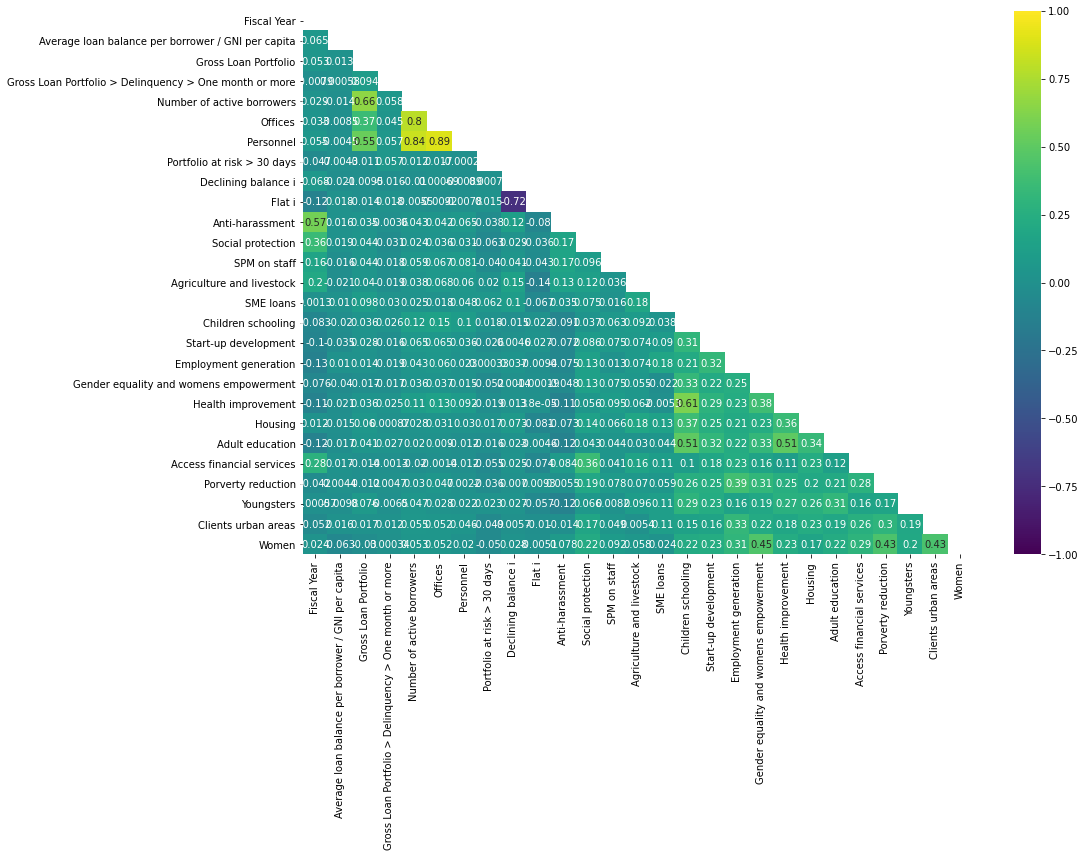

In [58]:
from Functions_EDA import *
corrCoef(social)

In [59]:
social.to_csv('/home/user/Documents/OYI_PC_2and3/TRABAJO/Allwomen/Projects/Final Project/csv_datasets/reduced_datasets/mfi_social.csv')